# Time Series for Weather and Glaciers Surface Mass Balance Prediction

## Index
 
* [Introduction](#Introduction)
* [Libraries](#Libraries)
* [Data](#Data)
    * [Annual SMB](#Annual-SMB)
        * [Ablation](#Ablation)
        * [Accumulation](#Accumulation)
    * [Weather Data](#Weather-Data)
* [Cleaning and Wrangling](#Cleaning-and-Wrangling)
    * [Columns selection](#Columns-selection)
    * [Headers standarizing](#Headers-standarizing)
    * [Data types change](#Data-types-change)
    * [Outliers](#Outliers)
    * [Null Values](#Null-Values)
    * [New Tables](#New-Tables)
* [Visualizations](#Visualizations)
    * [Ablation](#Ablation)
    * [Accumulation](#Accumulation)
    * [Meteo Seasonality](#Meteo-Seasonality)
* [Time Series Model](#Time-Series-Model)
    * [ARIMA](#ARIMA)
        * [Temperature](#Temperature)
    * [Store Dataframes](#Store-Dataframes)

## Introduction

Glaciers represent more than 2% of earth's water volume. They play an important environmental role and climate change accelerates its natural melting process.

Surface Mass Balance (SMB) is the mesure to analyse glaciers mass changes in time, comparing the ice and snow addition (accumulation) and loss (ablation).

The target of this study is to create a predictive model SMB's future changes related to the climate change.

We will use the dataset of Mer de Glace, a glacier placed in Chamonix Valley (French Alps) and the weather dataset of Argentière. This database is been provided by GLACIOCLIM.

Stakes in strategical points have been used to mesure parameters such as altitude, speed of glacier movement, width, accumulation and ablation.


## Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller

## Data

### Annual SMB

#### Ablation

In [3]:
file_list = [file for file in os.listdir('../datasets/Ablation Zone') if file.endswith('.csv')]
ablation = pd.DataFrame()
for file in file_list:
    abl_temp = pd.read_csv(('../datasets/Ablation Zone/{}').format(file))
    ablation = pd.concat([ablation, abl_temp], axis=0)

ablation = ablation.drop_duplicates().reset_index()
ablation

,index,profile_name,stake_year_setup,stake_number,day_start,month_start,year_start,day_end,month_end,year_end,x_lambert2e,y_lambert2e,altitude,annual_smb
0,0,Langue,1995,1,17,10,1995,3,11,1996,957173.68,111221.57,2074.93,-5.49
1,1,Langue,1995,3,17,10,1995,3,11,1996,956949.63,111887.49,2018.92,-6.07
2,2,Langue,1995,5,17,10,1995,3,11,1996,956731.47,112174.26,1990.57,-6.43
3,3,Langue,1995,6,17,10,1995,3,11,1996,955620.00,113106.86,1834.55,-8.68
4,4,Langue,1995,8,17,10,1995,3,11,1996,955545.88,113970.62,1715.02,-9.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0,Langue,2018,1,28,9,2018,17,10,2019,957193.35,111243.35,1985.81,-9.42
158,1,Langue,2018,2,28,9,2018,17,10,2019,957077.11,111520.71,1956.13,-9.13
159,2,Langue,2018,3,28,9,2018,17,10,2019,957036.77,111722.96,1941.11,-8.72
160,3,Langue,2018,7,28,9,2018,17,10,2019,955618.79,113288.54,1700.05,-9.85


#### Accumulation

In [4]:
acc_list = [file for file in os.listdir('../datasets/Accumulation Zone')]
accumulation = pd.DataFrame()
for file in acc_list:
    acc_temp = pd.read_csv(('../datasets/Accumulation Zone/{}').format(file))
    accumulation = pd.concat([accumulation, acc_temp], axis=0)

accumulation = accumulation.drop_duplicates().reset_index()
accumulation

,index,profile_name,stake_year_setup,stake_number,day_start,month_start,year_start,day_end,month_end,year_end,x_lambert2e,y_lambert2e,altitude,annual_smb
0,0,acum,1996,1,9,9,1995,11,9,1996,953420.0,107630.0,3570.0,1.54
1,1,acum,1996,3,9,9,1995,11,9,1996,954320.0,106430.0,3370.0,0.69
2,2,acum,1996,4,9,9,1995,11,9,1996,955430.0,105770.0,3090.0,1.23
3,3,acum,1996,5,9,9,1995,11,9,1996,956070.0,106430.0,2930.0,0.29
4,4,acum,1996,6,9,9,1995,11,9,1996,955930.0,107620.0,2750.0,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,5,acum,2018,11,7,9,2017,5,9,2018,955863.0,106597.0,2920.0,0.84
115,0,acum,2019,2,5,9,2018,17,9,2019,953210.0,106820.0,3530.0,1.87
116,1,acum,2019,5,5,9,2018,17,9,2019,956070.0,106430.0,2930.0,0.11
117,2,acum,2019,9,5,9,2018,17,9,2019,954356.0,106064.0,3220.0,0.37


### Weather Data

In [5]:
file_list = [file for file in os.listdir('../datasets/Données journalières') if file.endswith('.xls')]
meteo = pd.DataFrame()
for file in file_list:
    df_temp = pd.read_excel(('../datasets/Données journalières/{}').format(file))
    meteo = pd.concat([meteo, df_temp], axis=0)
    meteo.columns = df_temp.columns
    
meteo = meteo.drop_duplicates().reset_index()
meteo

,index,Unnamed: 0,SW inc (W/m2),LW inc (W/m2),RH (%),T (°C),Wind speed (m/s)
0,0,2007-01-01,12.94,293.2,94.50,-3.399,6.945
1,1,2007-01-02,19.44,269.7,91.30,-10.450,7.530
2,2,2007-01-03,52.12,261.9,93.10,-7.030,2.352
3,3,2007-01-04,27.38,291.1,95.20,-3.753,5.173
4,4,2007-01-05,42.25,240.4,60.82,-3.041,2.526
...,...,...,...,...,...,...,...
4743,360,2019-12-27,32.19,252.9,89.60,-5.112,4.779
4744,361,2019-12-28,37.55,206.0,24.35,1.057,3.242
4745,362,2019-12-29,36.12,226.5,24.05,1.842,2.264
4746,363,2019-12-30,36.48,236.0,34.10,2.159,2.162


### Cleaning and Wrangling

#### Columns selection

In [6]:
ablation.drop(['stake_year_setup', 'day_start', 'month_start', 'year_start',
               'day_end', 'month_end'], axis=1, inplace=True)
accumulation.drop(['stake_year_setup', 'day_start', 'month_start', 'year_start',
               'day_end', 'month_end'], axis=1, inplace=True)
meteo.drop(['index'], axis=1, inplace=True)

#### Headers standarizing

In [7]:
ablation.rename(columns={'year_end' : 'year', 'annual_smb' : 'ablation'}, inplace=True)
accumulation.rename(columns={'year_end' : 'year', 'annual_smb' : 'accumulation'}, inplace=True)
meteo.columns = [col.lower().replace(" ", "_") for col in meteo.columns]
meteo.rename(columns={'unnamed:_0' : 'date', 'sw_inc_(w/m2)' : 'sw_irrad', 'lw_inc_(w/m2)' : 'lw_irrad', 'rh_(%)' : 'humidity', 't_(°c)' : 'temperature', 'wind_speed_(m/s)' : 'wind_speed'}, inplace=True)

#### Data types change

In [8]:
ablation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         162 non-null    int64  
 1   profile_name  162 non-null    object 
 2   stake_number  162 non-null    int64  
 3   year          162 non-null    int64  
 4   x_lambert2e   162 non-null    float64
 5   y_lambert2e   162 non-null    float64
 6   altitude      162 non-null    float64
 7   ablation      162 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 10.2+ KB


In [9]:
accumulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         119 non-null    int64  
 1   profile_name  119 non-null    object 
 2   stake_number  119 non-null    int64  
 3   year          119 non-null    int64  
 4   x_lambert2e   119 non-null    float64
 5   y_lambert2e   119 non-null    float64
 6   altitude      119 non-null    float64
 7   accumulation  119 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 7.6+ KB


In [10]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4748 non-null   datetime64[ns]
 1   sw_irrad     4722 non-null   float64       
 2   lw_irrad     4722 non-null   float64       
 3   humidity     4316 non-null   float64       
 4   temperature  4609 non-null   float64       
 5   wind_speed   4722 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 222.7 KB


In [11]:
ablation['year'] = pd.to_datetime(accumulation['year'], format='%Y')
accumulation['year'] = pd.to_datetime(accumulation['year'], format='%Y')
meteo.index = pd.DatetimeIndex(meteo.date, freq='D')
meteo = meteo.drop(['date'], axis=1)

#### Outliers

In [12]:
ablation.describe()

,index,stake_number,x_lambert2e,y_lambert2e,altitude,ablation
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,3.141975,5.092593,956401.651420,112493.687716,1881.699321,-8.147654
std,2.272895,3.041750,705.957084,996.031360,138.913846,1.667987
min,0.000000,1.000000,955400.000000,111209.900000,1610.650000,-11.920000
25%,1.000000,2.250000,955622.342500,111580.057500,1740.587500,-9.527500
50%,3.000000,5.000000,956721.775000,112202.795000,1951.880000,-7.900000
75%,5.000000,7.750000,957048.295000,113312.210000,1995.835000,-6.802500
max,9.000000,14.000000,957202.020000,114450.000000,2074.930000,-1.120000


In [13]:
accumulation.describe()

,index,stake_number,x_lambert2e,y_lambert2e,altitude,accumulation
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,2.235294,6.084034,954961.000000,106266.546218,3169.327731,1.066555
std,1.764556,3.240579,1053.759058,643.833945,223.753538,0.800619
min,0.000000,1.000000,953210.000000,105080.000000,2740.000000,-0.670000
25%,1.000000,4.000000,954356.000000,105770.000000,2930.000000,0.495000
50%,2.000000,5.000000,954792.000000,106064.000000,3130.000000,0.950000
75%,3.000000,9.000000,955863.000000,106597.000000,3260.000000,1.495000
max,7.000000,11.000000,957270.000000,107630.000000,3570.000000,3.190000


In [14]:
meteo.describe()

,sw_irrad,lw_irrad,humidity,temperature,wind_speed
count,4722.000000,4722.000000,4316.000000,4609.000000,4722.000000
mean,150.303213,277.060779,62.628214,-9.595999,2.901138
std,272.167973,243.001406,153.481799,272.703525,1.743156
min,-6999.000000,149.400000,-6999.000000,-6999.000000,0.000000
25%,70.925000,241.400000,51.195000,-3.868000,1.911250
50%,152.000000,272.900000,68.165000,1.193000,2.657000
75%,235.500000,298.800000,83.300000,6.182000,3.583500
max,422.700000,6999.000000,107.300000,18.160000,21.620000


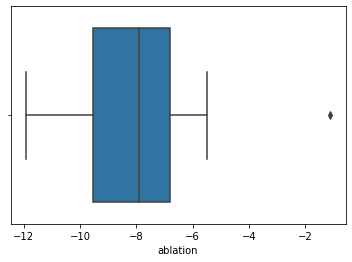

In [15]:
sns.boxplot(x=ablation['ablation']);

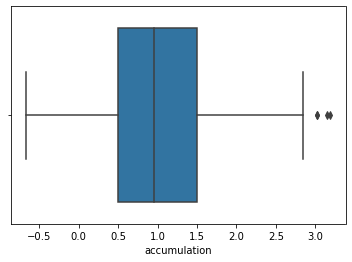

In [16]:
sns.boxplot(x=accumulation['accumulation']);

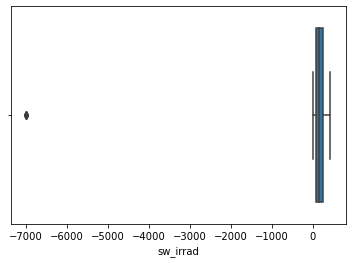

In [17]:
sns.boxplot(x=meteo['sw_irrad']);

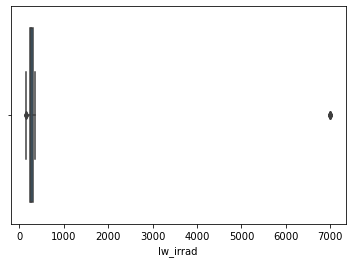

In [18]:
sns.boxplot(x=meteo['lw_irrad']);

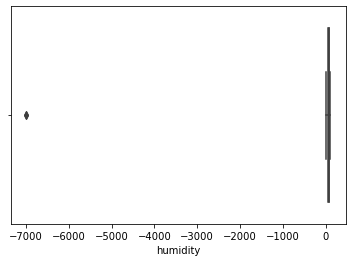

In [19]:
sns.boxplot(x=meteo['humidity']);

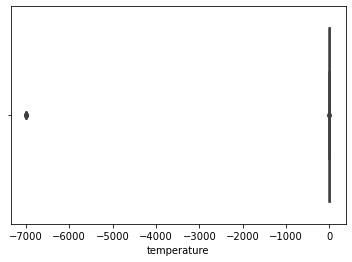

In [20]:
sns.boxplot(x=meteo['temperature']);

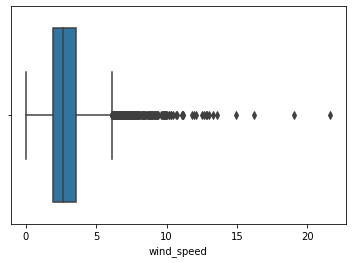

In [21]:
sns.boxplot(x=meteo['wind_speed']);

In [22]:
meteo[meteo['sw_irrad']< -1000]

,sw_irrad,lw_irrad,humidity,temperature,wind_speed
date,,,,,
2013-11-08,-6999.0,6999.0,NaN,-6999.0,5.182
2013-11-09,-6999.0,254.7,NaN,-6999.0,3.934
2013-11-12,-6999.0,6999.0,NaN,-6999.0,2.402
2013-11-13,-6999.0,207.6,NaN,-6999.0,1.879
2013-11-14,-6999.0,247.4,NaN,-6999.0,2.907
2013-11-16,-6999.0,6999.0,NaN,-6999.0,1.948


In [23]:
def outliers(x):
    if abs(x)  > 1000:
        return None
    else:
        return x

In [24]:
for col in ['sw_irrad', 'lw_irrad', 'humidity', 'temperature', 'wind_speed']:
    meteo[col] = meteo[col].apply(outliers)
    

#### Null Values

In [25]:
meteo = meteo.fillna(method="ffill")

#### New Tables

In [26]:
abl_by_year = ablation.groupby(by=['year'])['ablation'].sum().reset_index()
acc_by_year = accumulation.groupby(by=['year'])['accumulation'].sum().reset_index()
smb = abl_by_year.merge(acc_by_year, on='year')


### Visualizations

#### Ablation

<AxesSubplot:xlabel='year', ylabel='ablation'>

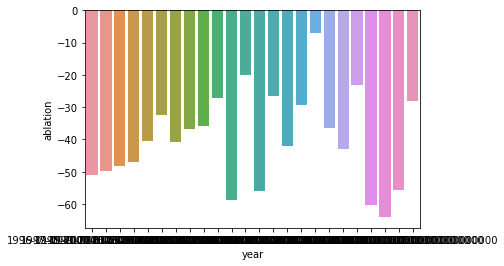

In [27]:
sns.barplot(x=abl_by_year['year'], y=abl_by_year['ablation'])

#### Accumulation

<AxesSubplot:xlabel='year', ylabel='accumulation'>

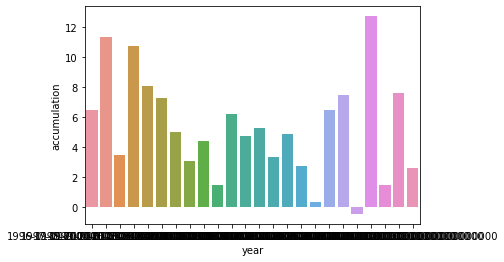

In [28]:
sns.barplot(x=acc_by_year['year'], y=acc_by_year['accumulation'])

#### Meteo Seasonality

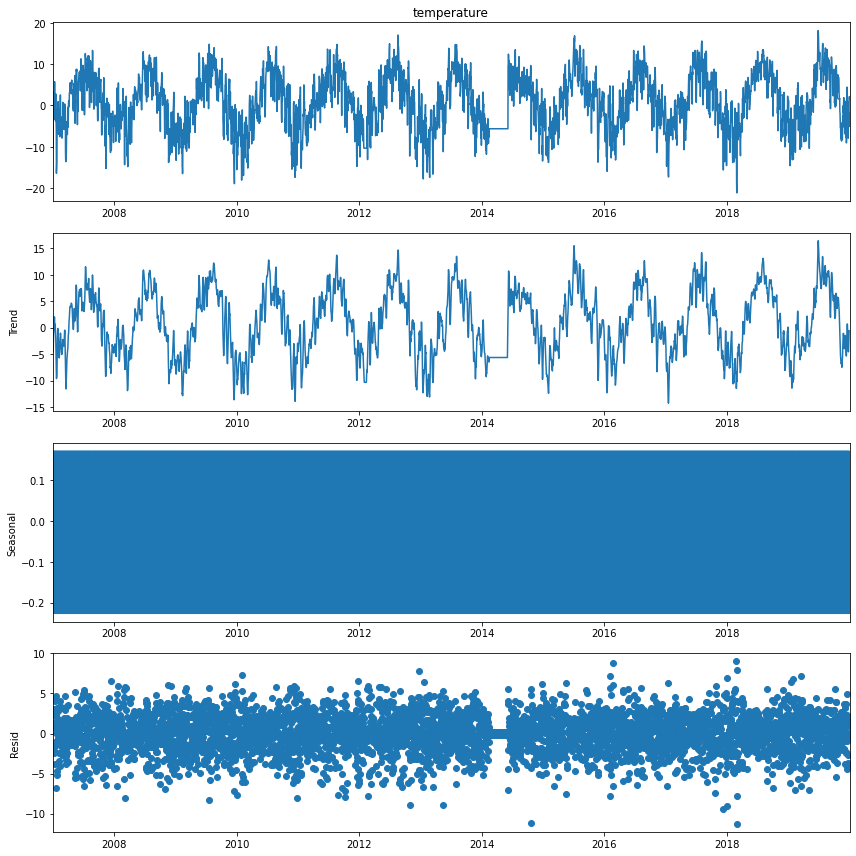

In [29]:
res = sm.tsa.seasonal_decompose(meteo.temperature)
with plt.rc_context():
    plt.rc("figure", figsize=(12,12))
    res.plot()

In [30]:
adfuller(meteo.temperature)[1]

2.086282032991226e-05

## Time Series Model
### ARIMA
#### Temperature

In [31]:
train, test = meteo.temperature[:-50], meteo.temperature[-50:]

model = ARIMA(train, order=[12, 0, 0])
model_fit = model.fit()
predictions = model_fit.predict(start=len(train), end=len(train)+len(test))
predictions = predictions.reset_index()

In [32]:
test = test.reset_index()
pred_test = predictions.copy()
pred_test['test'] = test['temperature']
pred_test.head()

,index,predicted_mean,test
0,2019-11-12,-3.398354,-8.180
1,2019-11-13,-3.180419,-8.620
2,2019-11-14,-3.030515,-4.916
3,2019-11-15,-3.032273,-6.595
4,2019-11-16,-2.942784,-7.833


<AxesSubplot:xlabel='predicted_mean', ylabel='test'>

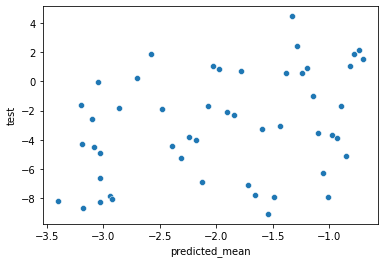

In [33]:
sns.scatterplot(data=pred_test, x='predicted_mean', y='test')

### Store Dataframes

In [35]:
meteo.to_csv('../dataframes/meteo_temp.csv')
abl_by_year.to_csv('../dataframes/annual_abl.csv')
acc_by_year.to_csv('../dataframes/annual_acc.csv')
smb.to_csv('../dataframes/smb.csv')
predictions.to_csv('../dataframes/pred.csv')
pred_test.to_csv('../dataframes/pred-test.csv')